<a href="https://colab.research.google.com/github/EmmanuelKnows/DS-Codveda/blob/main/Clustering_(Unsupervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (Unsupervised
Learning)
Perform K-Means clustering on the dataset from "churn-bigml-20.csv" including data preprocessing (one-hot encoding, scaling), determining the optimal number of clusters using the Elbow method and Silhouette score, applying K-Means clustering, performing dimensionality reduction with PCA, visualizing the clusters, and interpreting the clustering results.

## Load and Preprocess Data

Load the dataset from 'churn-bigml-20.csv'. Identify and handle categorical features using one-hot encoding, and scale numerical features using StandardScaler to prepare the data for K-Means clustering.


In [1]:
import pandas as pd

df = pd.read_csv('/content/churn-bigml-20.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataFrame Info:")
df.info()

First 5 rows of the dataset:
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29

Separate categorical and numerical features. Then apply one-hot encoding to the identified categorical columns and scale the numerical features using StandardScaler. Combine the processed features into a single DataFrame named `df_preprocessed`.



In [2]:
from sklearn.preprocessing import StandardScaler

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df_scaled_numerical = scaler.fit_transform(df[numerical_cols])

# Create a DataFrame for scaled numerical features with original column names
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols, index=df.index)

# Combine one-hot encoded categorical features and scaled numerical features
# First, drop the original numerical columns from df_encoded
df_preprocessed = df_encoded.drop(columns=numerical_cols)
# Then, concatenate the scaled numerical features
df_preprocessed = pd.concat([df_preprocessed, df_scaled_numerical], axis=1)

print("Shape of preprocessed DataFrame:", df_preprocessed.shape)
print("First 5 rows of preprocessed DataFrame:")
print(df_preprocessed.head())

Shape of preprocessed DataFrame: (667, 69)
First 5 rows of preprocessed DataFrame:
   State_AL  State_AR  State_AZ  State_CA  State_CO  State_CT  State_DC  \
0     False     False     False     False     False     False     False   
1     False     False     False     False     False     False     False   
2     False     False     False     False     False     False     False   
3     False     False     False     False     False     False     False   
4     False     False     False     False     False     False     False   

   State_DE  State_FL  State_GA  ...  Total eve minutes  Total eve calls  \
0     False     False     False  ...           2.983872        -1.081478   
1     False     False     False  ...           0.506113        -0.923033   
2     False     False     False  ...           2.303545        -0.183625   
3     False     False     False  ...          -1.329563         0.080450   
4     False     False     False  ...           0.236397         0.450154   

   Total 

## Determine Optimal Clusters (Elbow Method)

Applying the Elbow Method to the preprocessed data. Run the K-Means for a range of cluster numbers (e.g., from 1 to 10) and calculate the inertia for each. Plot the inertia values against the number of clusters to visually identify the 'elbow point', which suggests the optimal number of clusters.


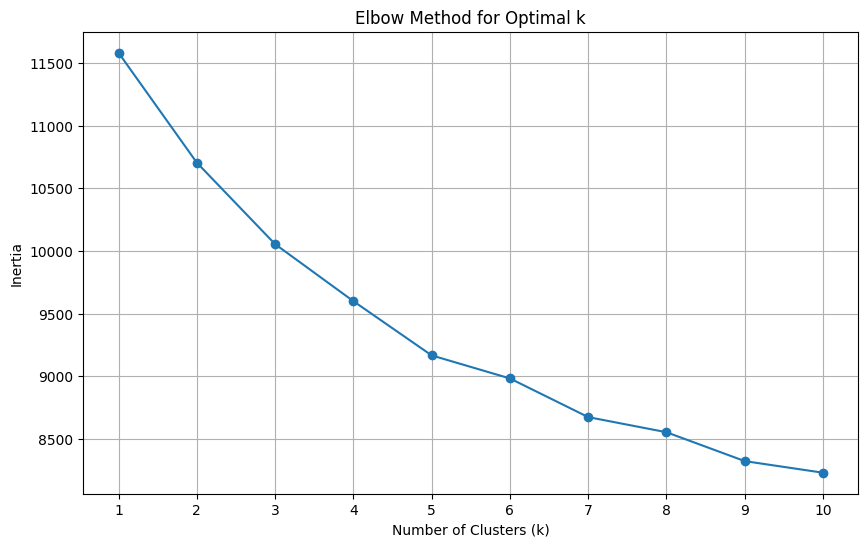

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_preprocessed)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Determine Optimal Clusters (Silhouette Score)

Calculate the silhouette score for a range of cluster numbers (e.g., from 2 to 10) on the preprocessed data. Plot the silhouette scores against the number of clusters to find the value of k that yields the highest score, indicating a better-defined clustering structure.


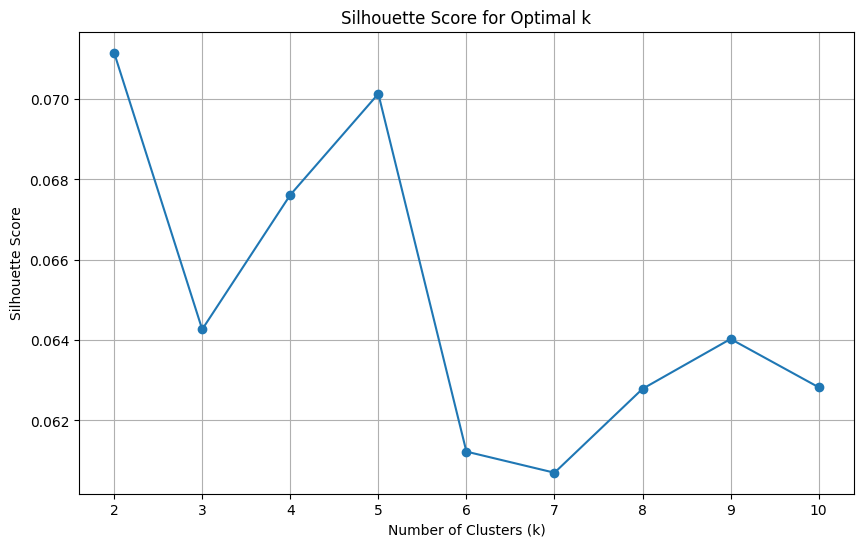

In [4]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range_silhouette = range(2, 11) # Test k from 2 to 10 for silhouette score

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_preprocessed)
    score = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Score results
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

## Apply K-Means Clustering

Apply K-Means clustering to the preprocessed data using the optimal number of clusters determined from the elbow method and silhouette score. Assign the resulting cluster labels back to the original DataFrame.


In [5]:
k_optimal = 2 # Chosen based on the highest silhouette score and elbow point

kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
cluster_labels_optimal = kmeans_optimal.fit_predict(df_preprocessed)

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels_optimal

print(f"Optimal number of clusters chosen: {k_optimal}")
print("First 5 rows of original DataFrame with cluster labels:")
print(df.head())

Optimal number of clusters chosen: 2
First 5 rows of original DataFrame with cluster labels:
  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  ...  Total eve charge  \
0             31.3

## Dimensionality Reduction with PCA

Perform Principal Component Analysis (PCA) on the preprocessed data to reduce its dimensionality to 2 components. This will allow for a 2D visualization of the clusters.


Import the PCA class, instantiate it with 2 components, fit and transform the preprocessed data, and then organize the output into a DataFrame with appropriate column names.



In [6]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components and a random state for reproducibility
pca = PCA(n_components=2, random_state=42)

# Fit PCA to the preprocessed data and transform it
df_pca = pca.fit_transform(df_preprocessed)

# Create a DataFrame for the PCA results with meaningful column names
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

print("Shape of PCA-transformed DataFrame:", df_pca.shape)
print("First 5 rows of PCA-transformed DataFrame:")
print(df_pca.head())

Shape of PCA-transformed DataFrame: (667, 2)
First 5 rows of PCA-transformed DataFrame:
        PC1       PC2
0  0.240244 -3.076980
1  0.478992  0.845024
2 -3.113357 -5.175142
3  1.289954  1.120898
4  0.430951  0.747690


Create a scatter plot to visualize these clusters in a 2D space. Each cluster will be represented by a different color.



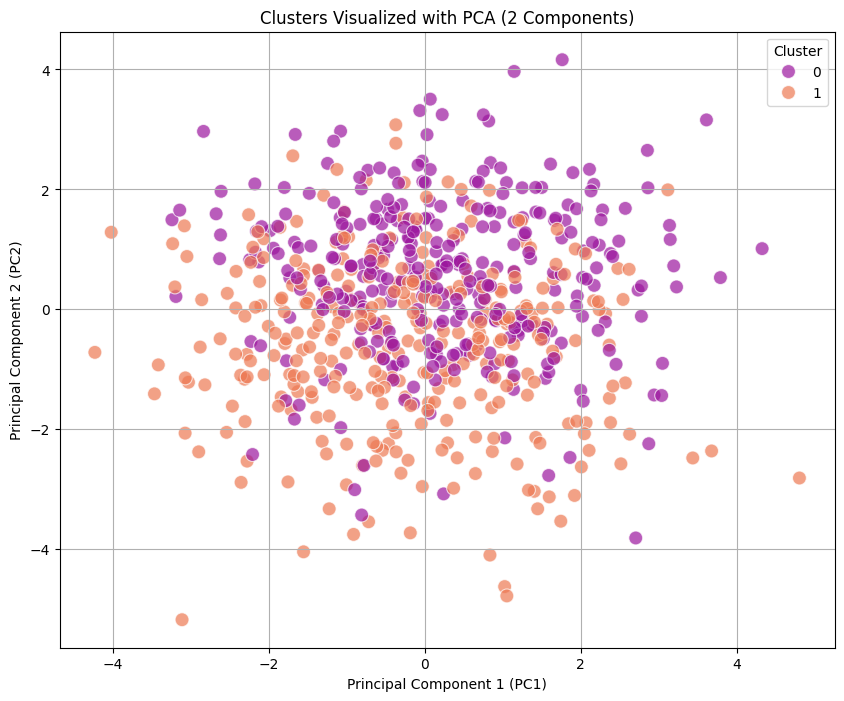

In [11]:
import seaborn as sns

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = df['Cluster']

# Plot the clusters using the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='plasma', s=100, alpha=0.7)
plt.title('Clusters Visualized with PCA (2 Components)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Interpret Clustering Results

Analyze the characteristics of each cluster by examining the mean or median values of the original features within each group.


In [8]:
numerical_cols_original = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'Area code' from the numerical columns for mean calculation as it's more categorical in nature
# and 'Account length' and 'Number vmail messages' can be kept for now as they contribute to behavior
numerical_cols_for_analysis = [col for col in numerical_cols_original if col not in ['Area code']]

cluster_means = df.groupby('Cluster')[numerical_cols_for_analysis].mean()

print("Mean values of numerical features per cluster:")
print(cluster_means)

Mean values of numerical features per cluster:
         Account length  Number vmail messages  Total day minutes  \
Cluster                                                             
0            103.783784              10.141141         150.230030   
1            101.901198               6.679641         211.574251   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             101.369369         25.539790         217.543544   
1             100.505988         35.968114         189.209581   

         Total eve calls  Total eve charge  Total night minutes  \
Cluster                                                           
0             100.135135         18.491381           200.502102   
1             100.817365         16.082754           198.870958   

         Total night calls  Total night charge  Total intl minutes  \
Cluster                                                              
0     

Further characterize the clusters, I will analyze the categorical features by calculating the value counts for each category within each cluster. Providing insights into how categorical attributes like 'International plan', 'Voice mail plan', 'State', and 'Churn' are distributed across the identified clusters.



In [9]:
categorical_cols_original = df.select_dtypes(include=['object', 'bool']).columns

# Exclude 'State' for now to keep the output manageable, can add if needed for deeper dive
categorical_cols_for_analysis = [col for col in categorical_cols_original if col not in ['State']]

print("\nValue counts of categorical features per cluster:")
for col in categorical_cols_for_analysis:
    print(f"\nFeature: {col}")
    print(df.groupby('Cluster')[col].value_counts(normalize=True).unstack(fill_value=0))



Value counts of categorical features per cluster:

Feature: International plan
International plan        No       Yes
Cluster                               
0                   0.924925  0.075075
1                   0.916168  0.083832

Feature: Voice mail plan
Voice mail plan        No       Yes
Cluster                            
0                0.660661  0.339339
1                0.772455  0.227545

Feature: Churn
Churn       False     True 
Cluster                    
0        0.897898  0.102102
1        0.817365  0.182635


### Cluster Interpretation Summary

**Cluster 0** appears to represent customers with generally lower usage across various metrics. They have lower `Total day minutes`, `Total day charge`, and `Total eve minutes` compared to Cluster 1. They also show a slightly lower churn rate (around 10.2%) and a higher proportion of customers with voice mail plans. This cluster might represent more conservative users, or perhaps those who are less engaged with the service.

**Cluster 1**, on the other hand, seems to consist of customers with higher usage patterns. They exhibit significantly higher `Total day minutes` and `Total day charge`. While their `Total eve minutes` are lower, their overall activity is higher. Notably, Cluster 1 has a higher churn rate (around 18.3%) compared to Cluster 0, indicating a potentially more 'at-risk' group of high-usage customers. They also have a lower proportion of customers with voice mail plans. This cluster could represent power users or customers who are demanding more from the service, and thus more likely to churn if their needs are not met or if they find better alternatives.